# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.274691e+01     1.220995e+01
 * time: 0.002969980239868164
     1     6.179861e+01     9.515542e+00
 * time: 0.08554291725158691
     2     5.461451e+01     1.263546e+01
 * time: 0.09944891929626465
     3     3.942295e+01     9.513732e+00
 * time: 0.11845207214355469
     4     2.890547e+01     8.131949e+00
 * time: 0.13638806343078613
     5     2.361606e+01     6.734453e+00
 * time: 0.15219902992248535
     6     1.085600e+01     1.865214e+00
 * time: 0.16790008544921875
     7     8.363910e+00     1.817279e+00
 * time: 0.18092894554138184
     8     7.257091e+00     1.602528e+00
 * time: 0.19353389739990234
     9     7.007408e+00     1.412646e+00
 * time: 0.20653104782104492
    10     6.723088e+00     1.539406e+00
 * time: 0.25794005393981934
    11     6.495703e+00     1.586052e+00
 * time: 0.27173495292663574
    12     6.330827e+00     7.014144e-01
 * time: 0.2852160930633545
    13     6.238932e+00     1.136349e+00
 * time:

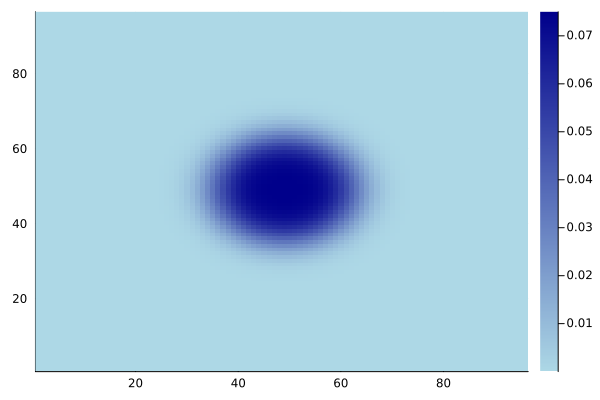

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)